In [1]:
# Import numpy symbols to scipy namespace
from numpy import *
from numpy.random import rand, randn
from numpy.fft import fft, ifft
from numpy.lib.scimath import *

In [2]:
import numpy as np

a = np.identity(3)

In [3]:
np.random.beta(5, 5, size=3)

array([0.56190696, 0.78174114, 0.4015026 ])

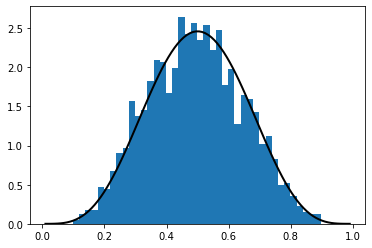

In [4]:
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [5]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [6]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.6339134834642708

In [7]:
q.mean()

0.5

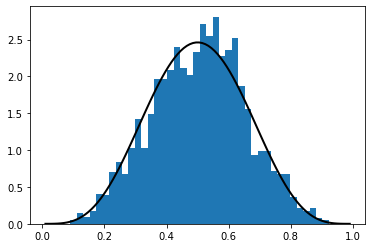

In [8]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()

In [9]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.9986523846339619, -0.002043242332118056)

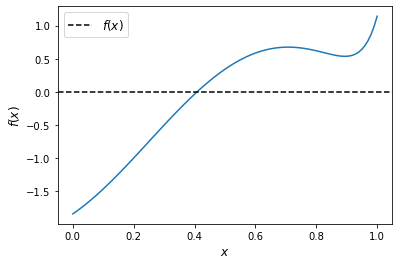

In [10]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls='--', c='k', label='$f(x)$')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [11]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:   # root is between lower and middle 
            lower, upper = lower, middle
        else:               # root is between middle and upper 
            lower, upper = middle, upper

    return 0.5 * (upper + lower)

In [12]:
bisect(f, 0, 1)

0.408294677734375

In [13]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

In [14]:
from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.40829350427935673

In [15]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

0.7001700000000279

In [16]:
from scipy.optimize import brentq

brentq(f, 0, 1)

0.40829350427936706

In [17]:
%timeit brentq(f, 0, 1)

16.2 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%timeit bisect(f, 0, 1)

58.7 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.)

In [20]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

In [21]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

In [22]:
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root-finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        print(f'Current mid point = {middle}')
        if f(middle) > 0:   # Implies root is between lower and middle
            return bisect(f, lower, middle)
        else:               # Implies root is between middle and upper
            return bisect(f, middle, upper)

In [23]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625


0.408294677734375